In [66]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from keras.layers import Flatten,Activation,Dense,Dropout
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 711s 4us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

# reshaping data

In [16]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

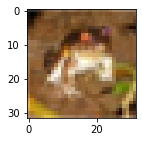

In [17]:
plt.figure(figsize=(3,2))
plt.imshow(x_train[0])

In [38]:
classes=['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [39]:
classes[5]

'dog'

# plot images

In [20]:
def plot_img(x,y,i):
    plt.figure(figsize=(3,2))
    plt.imshow(x_train[i])
    plt.xlabel(classes[y[i]])

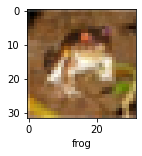

In [21]:
plot_img(x_train,y_train,0)

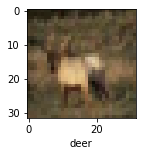

In [24]:
plot_img(x_train,y_train,3)

# ploting multipal random images

In [40]:
def show_images(rows,cols):
    plt.figure(figsize=[rows*2,cols*2])
    for i in range (1,rows*cols+1):
        plt.subplot(rows,cols,i)
        k=np.random.randint(0,50000)
        px=x_train[k]
        plt.imshow(px)
        plt.title(classes[y_train[k]])
        plt.axis('off')
    plt.tight_layout()

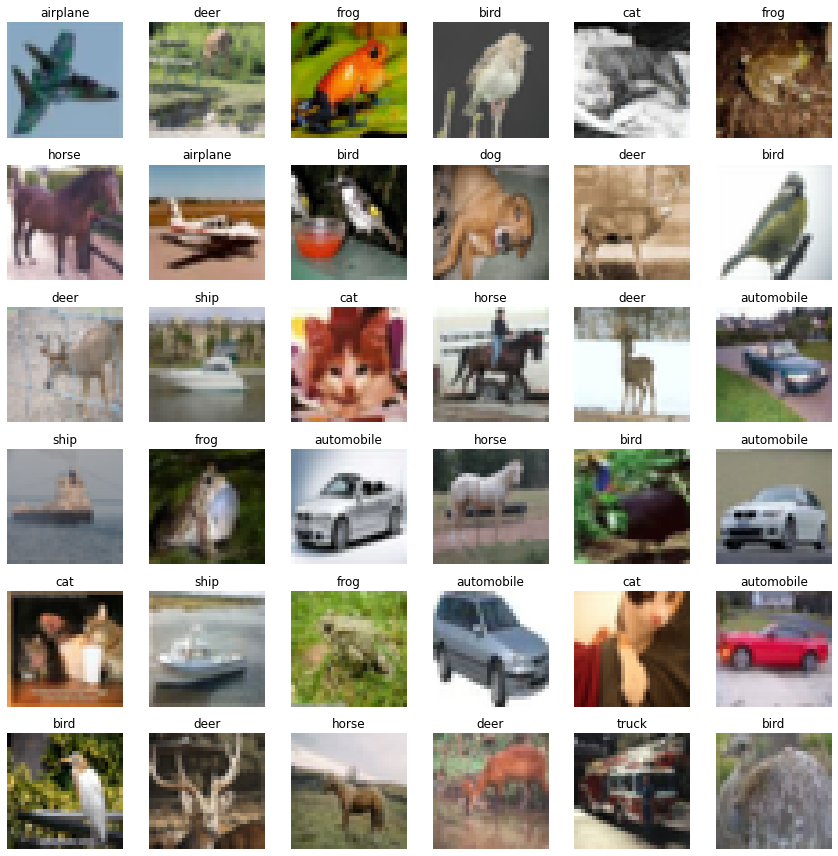

In [41]:
show_images(6,6)

# scale the data/ normalize the pixel values

In [44]:
x_train=x_train/255
x_test=x_test/255

In [45]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

# ANN Network

In [65]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')])

ann.compile(optimizer='SGD',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 142s 76ms/step - loss: 1.8105 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.6199 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.5409 - accuracy: 0.4543
Epoch 4/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.4809 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4297 - accuracy: 0.4965


# ANN clasification report

In [68]:
y_pred=ann.predict(x_test)


313/313 [==============================] - 14s 22ms/step


In [69]:
y_pridict=np.array([np.argmax(i)for i in y_pred])

In [73]:
print(classification_report(y_test,y_pridict))

              precision    recall  f1-score   support

           0       0.70      0.38      0.49      1000
           1       0.52      0.70      0.60      1000
           2       0.55      0.14      0.23      1000
           3       0.41      0.19      0.26      1000
           4       0.37      0.47      0.42      1000
           5       0.44      0.34      0.38      1000
           6       0.34      0.78      0.48      1000
           7       0.62      0.46      0.53      1000
           8       0.55      0.72      0.62      1000
           9       0.53      0.54      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



# CNN Network

In [74]:
cnn=models.Sequential([
    # cnn layer
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #hidden layer
    
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    # output layer
    layers.Dense(10,activation='softmax')])

In [75]:
cnn.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [76]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 83s 45ms/step - loss: 1.4408 - accuracy: 0.4822
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0802 - accuracy: 0.6230
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9458 - accuracy: 0.6724
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8478 - accuracy: 0.7043
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7738 - accuracy: 0.7299
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7005 - accuracy: 0.7554
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6392 - accuracy: 0.7775
Epoch 8/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.5758 - accuracy: 0.7968
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.5274 - accuracy: 0.8175
Epoch 10/10
1563/1563 [==============================] - 47s 30m

# CNN clasification report

In [77]:
y_pred=cnn.predict(x_test)
y_pridict=np.array([np.argmax(i)for i in y_pred])
print(classification_report(y_test,y_pridict))

313/313 [==============================] - 9s 9ms/step
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1000
           1       0.80      0.86      0.83      1000
           2       0.55      0.67      0.60      1000
           3       0.51      0.53      0.52      1000
           4       0.72      0.57      0.64      1000
           5       0.66      0.54      0.59      1000
           6       0.77      0.77      0.77      1000
           7       0.76      0.76      0.76      1000
           8       0.77      0.82      0.79      1000
           9       0.82      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



# evaluation

In [78]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 12s 10ms/step - loss: 0.9652 - accuracy: 0.7030


[0.9652001857757568, 0.703000009059906]

# conclusion

from overall study we can say that CNN classify the images more accuratly than the ANN